In [1]:
import pandas as pd

# Load each CSV file
edstays_df = pd.read_csv('mimic-iv-ed-2.2/edstays.csv')  
diagnosis_df = pd.read_csv('mimic-iv-ed-2.2/diagnosis.csv')
medrecon_df = pd.read_csv('mimic-iv-ed-2.2/medrecon.csv')
triage_df = pd.read_csv('mimic-iv-ed-2.2/triage.csv')

# Merge dataframes based on stay_id, specifying suffixes to avoid overlapping column names
merged_df = pd.merge(edstays_df, diagnosis_df, on='stay_id', suffixes=('_edstays', '_diagnosis'))
merged_df = pd.merge(merged_df, medrecon_df, on='stay_id', suffixes=('_merged', '_medrecon'))
merged_df = pd.merge(merged_df, triage_df, on='stay_id', suffixes=('_medrecon', '_triage'))

# Explore the merged dataframe  
merged_df.head()


,subject_id_edstays,hadm_id,stay_id,intime,outtime,gender,race,arrival_transport,disposition,subject_id_diagnosis,...,subject_id_triage,temperature,heartrate,resprate,o2sat,sbp,dbp,pain,acuity,chiefcomplaint
0,10000032,22595853.0,33258284,2180-05-06 19:17:00,2180-05-06 23:30:00,F,WHITE,AMBULANCE,ADMITTED,10000032,...,10000032,98.4,70.0,16.0,97.0,106.0,63.0,0,3.0,"Abd pain, Abdominal distention"
1,10000032,22595853.0,33258284,2180-05-06 19:17:00,2180-05-06 23:30:00,F,WHITE,AMBULANCE,ADMITTED,10000032,...,10000032,98.4,70.0,16.0,97.0,106.0,63.0,0,3.0,"Abd pain, Abdominal distention"
2,10000032,22595853.0,33258284,2180-05-06 19:17:00,2180-05-06 23:30:00,F,WHITE,AMBULANCE,ADMITTED,10000032,...,10000032,98.4,70.0,16.0,97.0,106.0,63.0,0,3.0,"Abd pain, Abdominal distention"
3,10000032,22595853.0,33258284,2180-05-06 19:17:00,2180-05-06 23:30:00,F,WHITE,AMBULANCE,ADMITTED,10000032,...,10000032,98.4,70.0,16.0,97.0,106.0,63.0,0,3.0,"Abd pain, Abdominal distention"
4,10000032,22595853.0,33258284,2180-05-06 19:17:00,2180-05-06 23:30:00,F,WHITE,AMBULANCE,ADMITTED,10000032,...,10000032,98.4,70.0,16.0,97.0,106.0,63.0,0,3.0,"Abd pain, Abdominal distention"


In [2]:
# Convert 'intime' and 'outtime' columns to datetime objects
merged_df['intime'] = pd.to_datetime(merged_df['intime'])
merged_df['outtime'] = pd.to_datetime(merged_df['outtime'])

# Calculate the length of stay in hours
merged_df['length_of_stay_hours'] = (merged_df['outtime'] - merged_df['intime']).dt.total_seconds() / 3600

# Convert length of stay to days
merged_df['length_of_stay_days'] = merged_df['length_of_stay_hours'] / 24

# Display the merged dataframe with the new length of stay column
merged_df

,subject_id_edstays,hadm_id,stay_id,intime,outtime,gender,race,arrival_transport,disposition,subject_id_diagnosis,...,heartrate,resprate,o2sat,sbp,dbp,pain,acuity,chiefcomplaint,length_of_stay_hours,length_of_stay_days
0,10000032,22595853.0,33258284,2180-05-06 19:17:00,2180-05-06 23:30:00,F,WHITE,AMBULANCE,ADMITTED,10000032,...,70.0,16.0,97.0,106.0,63.0,0,3.0,"Abd pain, Abdominal distention",4.216667,0.175694
1,10000032,22595853.0,33258284,2180-05-06 19:17:00,2180-05-06 23:30:00,F,WHITE,AMBULANCE,ADMITTED,10000032,...,70.0,16.0,97.0,106.0,63.0,0,3.0,"Abd pain, Abdominal distention",4.216667,0.175694
2,10000032,22595853.0,33258284,2180-05-06 19:17:00,2180-05-06 23:30:00,F,WHITE,AMBULANCE,ADMITTED,10000032,...,70.0,16.0,97.0,106.0,63.0,0,3.0,"Abd pain, Abdominal distention",4.216667,0.175694
3,10000032,22595853.0,33258284,2180-05-06 19:17:00,2180-05-06 23:30:00,F,WHITE,AMBULANCE,ADMITTED,10000032,...,70.0,16.0,97.0,106.0,63.0,0,3.0,"Abd pain, Abdominal distention",4.216667,0.175694
4,10000032,22595853.0,33258284,2180-05-06 19:17:00,2180-05-06 23:30:00,F,WHITE,AMBULANCE,ADMITTED,10000032,...,70.0,16.0,97.0,106.0,63.0,0,3.0,"Abd pain, Abdominal distention",4.216667,0.175694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6963339,19999828,29734428.0,30712109,2147-07-17 17:18:00,2147-07-18 17:34:00,F,WHITE,WALK IN,ADMITTED,19999828,...,83.0,18.0,100.0,107.0,75.0,8,2.0,"Abd pain, Wound eval",24.266667,1.011111
6963340,19999828,29734428.0,30712109,2147-07-17 17:18:00,2147-07-18 17:34:00,F,WHITE,WALK IN,ADMITTED,19999828,...,83.0,18.0,100.0,107.0,75.0,8,2.0,"Abd pain, Wound eval",24.266667,1.011111
6963341,19999828,29734428.0,30712109,2147-07-17 17:18:00,2147-07-18 17:34:00,F,WHITE,WALK IN,ADMITTED,19999828,...,83.0,18.0,100.0,107.0,75.0,8,2.0,"Abd pain, Wound eval",24.266667,1.011111
6963342,19999828,29734428.0,30712109,2147-07-17 17:18:00,2147-07-18 17:34:00,F,WHITE,WALK IN,ADMITTED,19999828,...,83.0,18.0,100.0,107.0,75.0,8,2.0,"Abd pain, Wound eval",24.266667,1.011111


In [3]:
print("Number of rows before removing missing stay_id values:", len(merged_df))
# Remove rows with missing stay_id
merged_df = merged_df.dropna(subset=['stay_id'])

# Verify that rows with missing stay_id are removed
print("Number of rows after removing missing stay_id values:", len(merged_df))

Number of rows before removing missing stay_id values: 6963344
Number of rows after removing missing stay_id values: 6963344


In [4]:
# Identify missing values
missing_values = merged_df.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
subject_id_edstays            0
hadm_id                 2996805
stay_id                       0
intime                        0
outtime                       0
gender                        0
race                          0
arrival_transport             0
disposition                   0
subject_id_diagnosis          0
seq_num                       0
icd_code                      0
icd_version                   0
icd_title                     0
subject_id_medrecon           0
charttime                     0
name                          0
gsn                           0
ndc                           0
etc_rn                        0
etccode                   25325
etcdescription            25325
subject_id_triage             0
temperature              256378
heartrate                152953
resprate                 214854
o2sat                    214066
sbp                      166287
dbp                      181055
pain                     148734
acuity                  

In [5]:

merged_df.head()

,subject_id_edstays,hadm_id,stay_id,intime,outtime,gender,race,arrival_transport,disposition,subject_id_diagnosis,...,heartrate,resprate,o2sat,sbp,dbp,pain,acuity,chiefcomplaint,length_of_stay_hours,length_of_stay_days
0,10000032,22595853.0,33258284,2180-05-06 19:17:00,2180-05-06 23:30:00,F,WHITE,AMBULANCE,ADMITTED,10000032,...,70.0,16.0,97.0,106.0,63.0,0,3.0,"Abd pain, Abdominal distention",4.216667,0.175694
1,10000032,22595853.0,33258284,2180-05-06 19:17:00,2180-05-06 23:30:00,F,WHITE,AMBULANCE,ADMITTED,10000032,...,70.0,16.0,97.0,106.0,63.0,0,3.0,"Abd pain, Abdominal distention",4.216667,0.175694
2,10000032,22595853.0,33258284,2180-05-06 19:17:00,2180-05-06 23:30:00,F,WHITE,AMBULANCE,ADMITTED,10000032,...,70.0,16.0,97.0,106.0,63.0,0,3.0,"Abd pain, Abdominal distention",4.216667,0.175694
3,10000032,22595853.0,33258284,2180-05-06 19:17:00,2180-05-06 23:30:00,F,WHITE,AMBULANCE,ADMITTED,10000032,...,70.0,16.0,97.0,106.0,63.0,0,3.0,"Abd pain, Abdominal distention",4.216667,0.175694
4,10000032,22595853.0,33258284,2180-05-06 19:17:00,2180-05-06 23:30:00,F,WHITE,AMBULANCE,ADMITTED,10000032,...,70.0,16.0,97.0,106.0,63.0,0,3.0,"Abd pain, Abdominal distention",4.216667,0.175694


In [6]:
# Drop rows where 'length_of_stay_hours' is greater than 24
merged_df = merged_df[merged_df['length_of_stay_hours'] <= 24]

# Verify the changes
merged_df


,subject_id_edstays,hadm_id,stay_id,intime,outtime,gender,race,arrival_transport,disposition,subject_id_diagnosis,...,heartrate,resprate,o2sat,sbp,dbp,pain,acuity,chiefcomplaint,length_of_stay_hours,length_of_stay_days
0,10000032,22595853.0,33258284,2180-05-06 19:17:00,2180-05-06 23:30:00,F,WHITE,AMBULANCE,ADMITTED,10000032,...,70.0,16.0,97.0,106.0,63.0,0,3.0,"Abd pain, Abdominal distention",4.216667,0.175694
1,10000032,22595853.0,33258284,2180-05-06 19:17:00,2180-05-06 23:30:00,F,WHITE,AMBULANCE,ADMITTED,10000032,...,70.0,16.0,97.0,106.0,63.0,0,3.0,"Abd pain, Abdominal distention",4.216667,0.175694
2,10000032,22595853.0,33258284,2180-05-06 19:17:00,2180-05-06 23:30:00,F,WHITE,AMBULANCE,ADMITTED,10000032,...,70.0,16.0,97.0,106.0,63.0,0,3.0,"Abd pain, Abdominal distention",4.216667,0.175694
3,10000032,22595853.0,33258284,2180-05-06 19:17:00,2180-05-06 23:30:00,F,WHITE,AMBULANCE,ADMITTED,10000032,...,70.0,16.0,97.0,106.0,63.0,0,3.0,"Abd pain, Abdominal distention",4.216667,0.175694
4,10000032,22595853.0,33258284,2180-05-06 19:17:00,2180-05-06 23:30:00,F,WHITE,AMBULANCE,ADMITTED,10000032,...,70.0,16.0,97.0,106.0,63.0,0,3.0,"Abd pain, Abdominal distention",4.216667,0.175694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6963330,19999828,25744818.0,32917002,2149-01-08 09:11:00,2149-01-08 18:12:00,F,WHITE,AMBULANCE,ADMITTED,19999828,...,112.0,18.0,100.0,110.0,82.0,4,2.0,"Abd pain, Wound eval",9.016667,0.375694
6963331,19999828,25744818.0,32917002,2149-01-08 09:11:00,2149-01-08 18:12:00,F,WHITE,AMBULANCE,ADMITTED,19999828,...,112.0,18.0,100.0,110.0,82.0,4,2.0,"Abd pain, Wound eval",9.016667,0.375694
6963332,19999828,25744818.0,32917002,2149-01-08 09:11:00,2149-01-08 18:12:00,F,WHITE,AMBULANCE,ADMITTED,19999828,...,112.0,18.0,100.0,110.0,82.0,4,2.0,"Abd pain, Wound eval",9.016667,0.375694
6963333,19999828,25744818.0,32917002,2149-01-08 09:11:00,2149-01-08 18:12:00,F,WHITE,AMBULANCE,ADMITTED,19999828,...,112.0,18.0,100.0,110.0,82.0,4,2.0,"Abd pain, Wound eval",9.016667,0.375694


In [7]:
missing_values = merged_df.isnull().sum()
print("Missing Values:")
print(missing_values)
# Remove rows with missing values
merged_df = merged_df.dropna()

# If you want to remove columns with missing values, you can specify axis=1
# merged_df_cleaned = merged_df.dropna(axis=1)

# Now, you can use merged_df_cleaned for further analysis
missing_values = merged_df.isnull().sum()
print("Missing Values:")
print(missing_values)


Missing Values:
subject_id_edstays            0
hadm_id                 2983864
stay_id                       0
intime                        0
outtime                       0
gender                        0
race                          0
arrival_transport             0
disposition                   0
subject_id_diagnosis          0
seq_num                       0
icd_code                      0
icd_version                   0
icd_title                     0
subject_id_medrecon           0
charttime                     0
name                          0
gsn                           0
ndc                           0
etc_rn                        0
etccode                   24438
etcdescription            24438
subject_id_triage             0
temperature              250486
heartrate                149403
resprate                 209355
o2sat                    208803
sbp                      162296
dbp                      176504
pain                     145870
acuity                  

In [8]:
import warnings
import pandas as pd

# Disable SettingWithCopyWarning
warnings.filterwarnings('ignore', category=pd.core.generic.SettingWithCopyWarning)

In [9]:
import pandas as pd

# Replace non-numeric values with NaN
merged_df['pain'] = pd.to_numeric(merged_df['pain'], errors='coerce')
merged_df['acuity'] = pd.to_numeric(merged_df['acuity'], errors='coerce')

# Calculate the mean for each numerical column
mean_temperature = merged_df['temperature'].mean()
mean_heartrate = merged_df['heartrate'].mean()
mean_resprate = merged_df['resprate'].mean()
mean_o2sat = merged_df['o2sat'].mean()
mean_sbp = merged_df['sbp'].mean()
mean_dbp = merged_df['dbp'].mean()
mean_pain = merged_df['pain'].mean()
mean_acuity = merged_df['acuity'].mean()

# Fill missing values with the mean
merged_df.loc[:, 'temperature'].fillna(mean_temperature, inplace=True)
merged_df.loc[:, 'heartrate'].fillna(mean_heartrate, inplace=True)
merged_df.loc[:, 'resprate'].fillna(mean_resprate, inplace=True)
merged_df.loc[:, 'o2sat'].fillna(mean_o2sat, inplace=True)
merged_df.loc[:, 'sbp'].fillna(mean_sbp, inplace=True)
merged_df.loc[:, 'dbp'].fillna(mean_dbp, inplace=True)
merged_df.loc[:, 'pain'].fillna(mean_pain, inplace=True)
merged_df.loc[:, 'acuity'].fillna(mean_acuity, inplace=True)


In [10]:
missing_values = merged_df.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
subject_id_edstays      0
hadm_id                 0
stay_id                 0
intime                  0
outtime                 0
gender                  0
race                    0
arrival_transport       0
disposition             0
subject_id_diagnosis    0
seq_num                 0
icd_code                0
icd_version             0
icd_title               0
subject_id_medrecon     0
charttime               0
name                    0
gsn                     0
ndc                     0
etc_rn                  0
etccode                 0
etcdescription          0
subject_id_triage       0
temperature             0
heartrate               0
resprate                0
o2sat                   0
sbp                     0
dbp                     0
pain                    0
acuity                  0
chiefcomplaint          0
length_of_stay_hours    0
length_of_stay_days     0
dtype: int64


In [15]:
import pandas as pd

bins = [-1, 5.6, 9, float('inf')]  # Less than 4 hours, 4-8 hours, More than 8 hours
labels = ['<4.1 hours', '4.1-6.9 hours', '>6.9 hours']

# Create a new column 'length_of_stay_class' with the classification labels
merged_df.loc[:, 'length_of_stay_class'] = pd.cut(merged_df['length_of_stay_hours'], bins=bins, labels=labels)

# Check the distribution of classes
print(merged_df['length_of_stay_class'].value_counts())


length_of_stay_class
<4.1 hours       1146563
4.1-6.9 hours    1106237
>6.9 hours       1069870
Name: count, dtype: int64


In [16]:
merged_df


,subject_id_edstays,hadm_id,stay_id,intime,outtime,gender,race,arrival_transport,disposition,subject_id_diagnosis,...,o2sat,sbp,dbp,pain,acuity,chiefcomplaint,length_of_stay_hours,length_of_stay_days,length_of_stay_class,length_of_stay_class_encoded
0,10000032,22595853.0,33258284,2180-05-06 19:17:00,2180-05-06 23:30:00,F,WHITE,AMBULANCE,ADMITTED,10000032,...,97.0,106.0,63.0,0.0,3.0,"Abd pain, Abdominal distention",4.216667,0.175694,<4.1 hours,1
1,10000032,22595853.0,33258284,2180-05-06 19:17:00,2180-05-06 23:30:00,F,WHITE,AMBULANCE,ADMITTED,10000032,...,97.0,106.0,63.0,0.0,3.0,"Abd pain, Abdominal distention",4.216667,0.175694,<4.1 hours,1
2,10000032,22595853.0,33258284,2180-05-06 19:17:00,2180-05-06 23:30:00,F,WHITE,AMBULANCE,ADMITTED,10000032,...,97.0,106.0,63.0,0.0,3.0,"Abd pain, Abdominal distention",4.216667,0.175694,<4.1 hours,1
3,10000032,22595853.0,33258284,2180-05-06 19:17:00,2180-05-06 23:30:00,F,WHITE,AMBULANCE,ADMITTED,10000032,...,97.0,106.0,63.0,0.0,3.0,"Abd pain, Abdominal distention",4.216667,0.175694,<4.1 hours,1
4,10000032,22595853.0,33258284,2180-05-06 19:17:00,2180-05-06 23:30:00,F,WHITE,AMBULANCE,ADMITTED,10000032,...,97.0,106.0,63.0,0.0,3.0,"Abd pain, Abdominal distention",4.216667,0.175694,<4.1 hours,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6963330,19999828,25744818.0,32917002,2149-01-08 09:11:00,2149-01-08 18:12:00,F,WHITE,AMBULANCE,ADMITTED,19999828,...,100.0,110.0,82.0,4.0,2.0,"Abd pain, Wound eval",9.016667,0.375694,>6.9 hours,2
6963331,19999828,25744818.0,32917002,2149-01-08 09:11:00,2149-01-08 18:12:00,F,WHITE,AMBULANCE,ADMITTED,19999828,...,100.0,110.0,82.0,4.0,2.0,"Abd pain, Wound eval",9.016667,0.375694,>6.9 hours,2
6963332,19999828,25744818.0,32917002,2149-01-08 09:11:00,2149-01-08 18:12:00,F,WHITE,AMBULANCE,ADMITTED,19999828,...,100.0,110.0,82.0,4.0,2.0,"Abd pain, Wound eval",9.016667,0.375694,>6.9 hours,2
6963333,19999828,25744818.0,32917002,2149-01-08 09:11:00,2149-01-08 18:12:00,F,WHITE,AMBULANCE,ADMITTED,19999828,...,100.0,110.0,82.0,4.0,2.0,"Abd pain, Wound eval",9.016667,0.375694,>6.9 hours,2


In [17]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode length_of_stay_class into numerical labels
merged_df['length_of_stay_class_encoded'] = label_encoder.fit_transform(merged_df['length_of_stay_class'])

# Check the mapping of original categories to numerical labels
print("Original Categories:", label_encoder.classes_)
print("Encoded Labels:", np.unique(merged_df['length_of_stay_class_encoded']))

# Now, you can use the 'length_of_stay_class_encoded' column as your target variable
y = merged_df['length_of_stay_class_encoded']


Original Categories: ['4.1-6.9 hours' '<4.1 hours' '>6.9 hours']
Encoded Labels: [0 1 2]


In [18]:
merged_df

,subject_id_edstays,hadm_id,stay_id,intime,outtime,gender,race,arrival_transport,disposition,subject_id_diagnosis,...,o2sat,sbp,dbp,pain,acuity,chiefcomplaint,length_of_stay_hours,length_of_stay_days,length_of_stay_class,length_of_stay_class_encoded
0,10000032,22595853.0,33258284,2180-05-06 19:17:00,2180-05-06 23:30:00,F,WHITE,AMBULANCE,ADMITTED,10000032,...,97.0,106.0,63.0,0.0,3.0,"Abd pain, Abdominal distention",4.216667,0.175694,<4.1 hours,1
1,10000032,22595853.0,33258284,2180-05-06 19:17:00,2180-05-06 23:30:00,F,WHITE,AMBULANCE,ADMITTED,10000032,...,97.0,106.0,63.0,0.0,3.0,"Abd pain, Abdominal distention",4.216667,0.175694,<4.1 hours,1
2,10000032,22595853.0,33258284,2180-05-06 19:17:00,2180-05-06 23:30:00,F,WHITE,AMBULANCE,ADMITTED,10000032,...,97.0,106.0,63.0,0.0,3.0,"Abd pain, Abdominal distention",4.216667,0.175694,<4.1 hours,1
3,10000032,22595853.0,33258284,2180-05-06 19:17:00,2180-05-06 23:30:00,F,WHITE,AMBULANCE,ADMITTED,10000032,...,97.0,106.0,63.0,0.0,3.0,"Abd pain, Abdominal distention",4.216667,0.175694,<4.1 hours,1
4,10000032,22595853.0,33258284,2180-05-06 19:17:00,2180-05-06 23:30:00,F,WHITE,AMBULANCE,ADMITTED,10000032,...,97.0,106.0,63.0,0.0,3.0,"Abd pain, Abdominal distention",4.216667,0.175694,<4.1 hours,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6963330,19999828,25744818.0,32917002,2149-01-08 09:11:00,2149-01-08 18:12:00,F,WHITE,AMBULANCE,ADMITTED,19999828,...,100.0,110.0,82.0,4.0,2.0,"Abd pain, Wound eval",9.016667,0.375694,>6.9 hours,2
6963331,19999828,25744818.0,32917002,2149-01-08 09:11:00,2149-01-08 18:12:00,F,WHITE,AMBULANCE,ADMITTED,19999828,...,100.0,110.0,82.0,4.0,2.0,"Abd pain, Wound eval",9.016667,0.375694,>6.9 hours,2
6963332,19999828,25744818.0,32917002,2149-01-08 09:11:00,2149-01-08 18:12:00,F,WHITE,AMBULANCE,ADMITTED,19999828,...,100.0,110.0,82.0,4.0,2.0,"Abd pain, Wound eval",9.016667,0.375694,>6.9 hours,2
6963333,19999828,25744818.0,32917002,2149-01-08 09:11:00,2149-01-08 18:12:00,F,WHITE,AMBULANCE,ADMITTED,19999828,...,100.0,110.0,82.0,4.0,2.0,"Abd pain, Wound eval",9.016667,0.375694,>6.9 hours,2


In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Define numerical features
numerical_features = ['temperature', 'heartrate', 'resprate', 'o2sat', 'sbp', 'dbp', 'pain', 'acuity']

# Convert numerical features to numeric type
merged_df[numerical_features] = merged_df[numerical_features].apply(pd.to_numeric, errors='coerce')

# Drop rows containing NaN values in numerical features
merged_df.dropna(subset=numerical_features, inplace=True)

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode length_of_stay_class into numerical labels
merged_df['length_of_stay_class_encoded'] = label_encoder.fit_transform(merged_df['length_of_stay_class'])

# Select target variable
y = merged_df['length_of_stay_class_encoded']

# Select features for training
X_train, X_test, y_train, y_test = train_test_split(merged_df[numerical_features], y, test_size=0.2, random_state=42)

# Initialize imputer with strategy='mean'
imputer = SimpleImputer(strategy='mean')

# Fit imputer on training data and transform both training and testing data
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Create and train multinomial logistic regression model
model = LogisticRegression(max_iter=20000, multi_class='multinomial')  # Specify multinomial logistic regression
model.fit(X_train_imputed, y_train)

# Predict length of stay class for test data
y_pred = model.predict(X_test_imputed)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.3862646606494175
Classification Report:
              precision    recall  f1-score   support

           0       0.37      0.10      0.16    220808
           1       0.39      0.62      0.48    229492
           2       0.38      0.43      0.40    214234

    accuracy                           0.39    664534
   macro avg       0.38      0.38      0.35    664534
weighted avg       0.38      0.39      0.35    664534



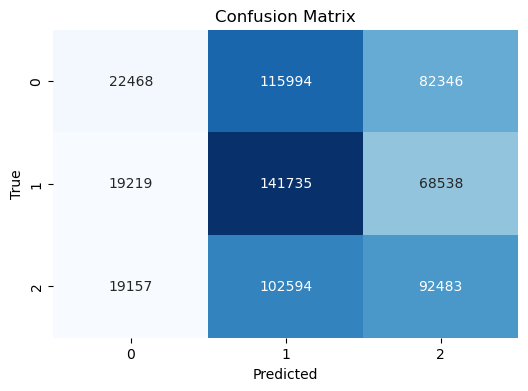

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


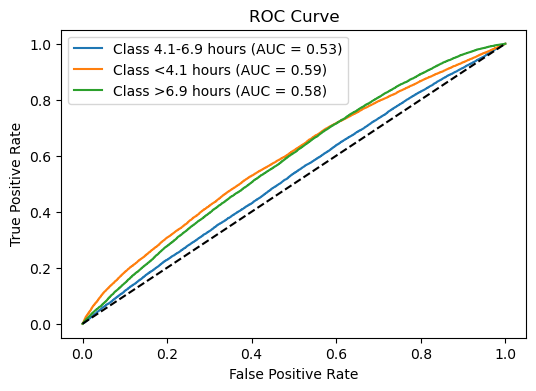

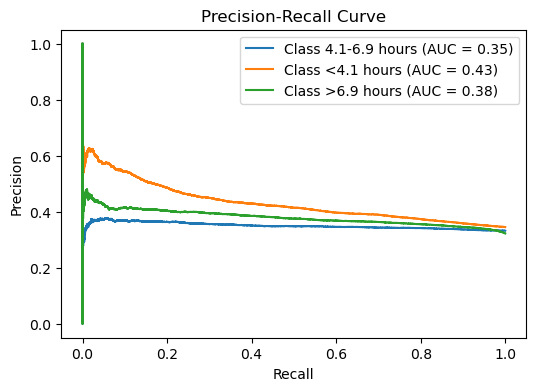

In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc

# Plot ROC Curve
plt.figure(figsize=(6, 4))
for i in range(len(label_encoder.classes_)):
    fpr, tpr, _ = roc_curve((y_test == i).astype(int), model.predict_proba(X_test_imputed)[:, i])
    auc_score = roc_auc_score((y_test == i).astype(int), model.predict_proba(X_test_imputed)[:, i])
    plt.plot(fpr, tpr, label=f'Class {label_encoder.classes_[i]} (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Plot Precision-Recall Curve
plt.figure(figsize=(6, 4))
for i in range(len(label_encoder.classes_)):
    precision, recall, _ = precision_recall_curve((y_test == i).astype(int), model.predict_proba(X_test_imputed)[:, i])
    auc_score = auc(recall, precision)
    plt.plot(recall, precision, label=f'Class {label_encoder.classes_[i]} (AUC = {auc_score:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()
